In [1]:
import os
import pandas as pd
import numpy as np
import scanpy as sc
from matplotlib.pyplot import rc_context

In [2]:
## set working directory
os.chdir("/data1/niehu/ibd_public_data_20210821/analysis_20220111/02.integrate/Endothelial/")

In [3]:
## read data
adata = sc.read_h5ad("Endothelial.bySample.n10.filtered.bbknn_umap_leiden_marker.res0.6.h5ad")
adata = sc.pp.subsample(adata, fraction=1., copy=True)

In [4]:
## add meta data
meta_data = pd.read_csv("/home/niehu/niehu/ibd_public_data_20210821/analysis_20220111/01.preprocess/cell_meta/ibd_meta_data_cells.csv", header=0)
meta_data.index = meta_data.cellName

select = meta_data[meta_data.index.isin(adata.obs.index.to_list())]
select = select.loc[adata.obs.index,:]

adata.obs["location2"] = pd.Categorical(select.location2)
adata.obs["location1"] = pd.Categorical(select.location1)
adata.obs["developmentStage"] = pd.Categorical(select.developmentStage)
adata.obs["disease"] = pd.Categorical(select.disease)

/home/niehu/niehu/soft/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3012: DtypeWarning: Columns (3,4,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


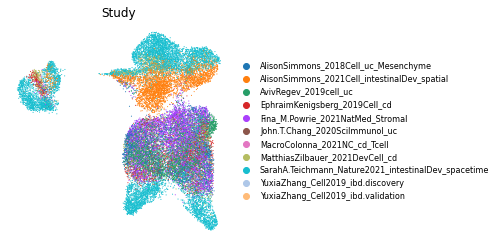

In [5]:
with rc_context({'figure.figsize': (4, 4)}):
    #sc.pl.umap(adata, color=["study"])
    sc.pl.umap(adata, color=['study'], title='Study', frameon=False, legend_fontsize = 8)

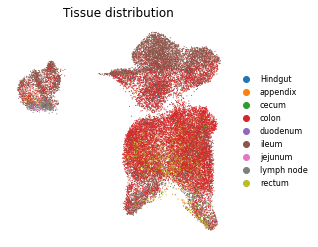

In [6]:
with rc_context({'figure.figsize': (4, 4)}):
    #sc.pl.umap(adata, color=["location2"])
    sc.pl.umap(adata, color=['location2'], title='Tissue distribution', frameon=False, legend_fontsize = 8)

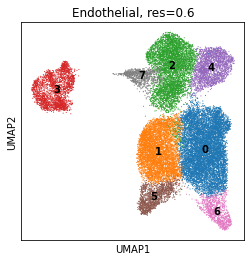

In [8]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color='leiden', legend_loc='on data', title='Endothelial, res=0.6', frameon=True, legend_fontsize = 10)

In [8]:
## Cycling EC => C7
## LEC => C3
## Adult venous EC => C1/C5
## Adult arterial EC => C6
## Adult arterial capillary => C0
## Fetal venous capillary => C2
## Fetal arterial EC => C4

In [9]:
## rename cluster
adata.obs["label"] = "Unknown"
adata.obs.loc[adata.obs.leiden.isin(['1','5']), "label"] = "Adult venous EC"
adata.obs.loc[adata.obs.leiden.isin(['2']), "label"] = "Fetal venous capillary"

adata.obs.loc[adata.obs.leiden.isin(['0']), "label"] = "Adult arterial capillary"
adata.obs.loc[adata.obs.leiden.isin(['6']), "label"] = "Adult arterial EC"
adata.obs.loc[adata.obs.leiden.isin(['4']), "label"] = "Fetal arterial EC"

adata.obs.loc[adata.obs.leiden.isin(['7']), "label"] = "Cycling EC"
adata.obs.loc[adata.obs.leiden.isin(['3']), "label"] = "LEC"

newOrder = ['LEC','Cycling EC',
            "Adult arterial capillary",'Fetal venous capillary',
            "Adult venous EC","Adult arterial EC","Fetal arterial EC"]

adata.obs.label =pd.Categorical(adata.obs.label)
adata.obs.label = adata.obs.label.cat.set_categories( newOrder )

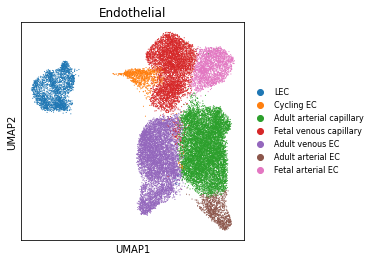

In [10]:
with rc_context({'figure.figsize': (4, 4)}):
    #sc.pl.umap(adata, color='label', legend_loc='on data', title='Endothelial', frameon=True, legend_fontsize = 8)
    sc.pl.umap(adata, color='label', title='Endothelial', frameon=True, legend_fontsize = 8)

In [11]:
adata.obs["major"] = "Endothelial"

In [12]:
adata = adata.raw.to_adata()

In [13]:
del adata.obs["location1"]
del adata.obs["location2"]
del adata.obs["developmentStage"]

In [14]:
adata.write_h5ad("Endothelial.clean.h5ad")

... storing 'major' as categorical


In [15]:
adata.write_loom("Endothelial.clean.loom", write_obsm_varm=True)

In [16]:
## done